# PACT

In [1]:
import numpy as np
from numpy.lib import scimath
from scipy import integrate
import matplotlib.pyplot as plt

## pa_plane()

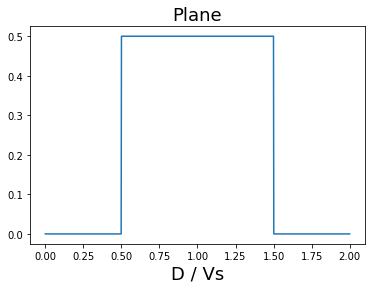

In [2]:
def pa_plane(L, D=1, A=1, Vs=1500):

    def p0(x):
        h = np.heaviside
        return A * h(x + D/2, 1) * h(-x + D/2, 1)

    def p(x, t):
        return 1/2 * p0(x - Vs * t) + 1/2 * p0(x + Vs * t)

    t = np.linspace(0, (L + D) / Vs, 1000)
    plt.plot(t*Vs/D, p(L, t))
    font = {'size': 18}
    plt.title('Plane', fontdict=font)
    plt.xlabel('D / Vs', fontdict=font)


plt.figure(1)
pa_plane(1)
plt.show()

## pa_sphere()

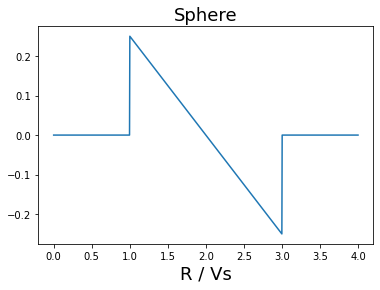

In [3]:
def pa_sphere(L, R=1, A=1, Vs=1500):

    def p0(r):
        h = np.heaviside
        return A * h(r, 1) * h(-r + R, 1)

    def p(r, t):
        return (r + Vs * t) / 2 / r * p0(r + Vs * t) + \
            (r - Vs * t) / 2 / r * p0(-r + Vs * t) + \
            (r - Vs * t) / 2 / r * p0(r - Vs * t)

    t = np.linspace(0, (L + 2 * R) / Vs, 1000)
    plt.plot(t*Vs/R, p(L, t))
    font = {'size': 18}
    plt.title('Sphere', fontdict=font)
    plt.xlabel('R / Vs', fontdict=font)


plt.figure(2)
pa_sphere(2)
plt.show()

## pa_cylinder()

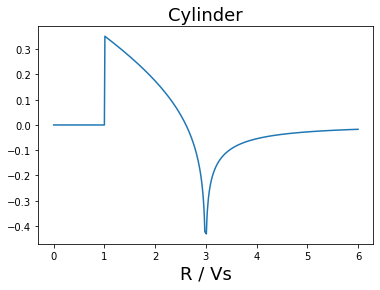

In [4]:
def pa_cylinder(L, R=1, A=1, Vs=1500):
    # initialize
    dvt = R / Vs / 100
    vt1 = np.linspace(0, (L - R) / Vs, int((L - R) / R * 100) + 1)
    vt2 = np.linspace((L - R) / Vs + dvt, (L + R) / Vs - dvt, 199)
    vt3 = np.linspace((L + R) / Vs + dvt, (L + 4 * R) / Vs, 300)
    t = np.hstack([vt1, vt2, vt3])
    p1 = vt1 * 0
    p2 = vt2 * 0
    p3 = vt3 * 0
    n2 = len(vt2)
    n3 = len(vt3)

    # When L - R < vt < L + R
    p2_temp = p2  # 初始化必须写在循环外面！写在循环里面会重复初始化！
    for n in range(n2):
        vt = vt2[n] * Vs
        integral_min = (L - R) / vt
        integral_max = (L**2 + vt**2 - R**2) / (2 * L * vt)

        def y1(x):
            return np.arctan(np.abs(scimath.sqrt(
                (R**2 - (L-vt*x)**2) / (L**2 + vt**2 - 2*L*vt*x - R**2)
            )))

        temp, _ = integrate.quad(y1, integral_min, integral_max)
        temp *= 4 * vt**2
        p2_temp[n] = (temp + np.pi * vt / L * (R**2 - (L - vt)**2)) / vt
    p2 = np.diff(p2_temp, axis=0) / dvt / (4 * np.pi)
    p2 = np.append(p2, p2[n2 - 2])

    # When vt > L + R
    p3_temp = p3
    for n in range(n3):
        vt = vt3[n] * Vs
        integral_min = (L - R) / vt
        integral_max = (L + R) / vt

        def y2(x):
            return np.arctan(np.abs(scimath.sqrt(
                (R**2 - (L-vt*x)**2) / (L**2 + vt**2 - 2*L*vt*x - R**2)
            )))

        temp, _ = integrate.quad(y2, integral_min, integral_max)
        temp *= 4 * vt**2
        p3_temp[n] = temp / vt
    p3 = np.diff(p3_temp, axis=0) / dvt / (4 * np.pi)
    p3 = np.append(p3, p3[n3 - 2])

    # Plot
    p = np.hstack([p1, p2, p3])
    plt.plot(t*Vs/R, A*p/Vs)
    font = {'size': 18}
    plt.title('Cylinder', fontdict=font)
    plt.xlabel('R / Vs', fontdict=font)


plt.figure(3)
pa_cylinder(2)
plt.show()

## pa_smallball()

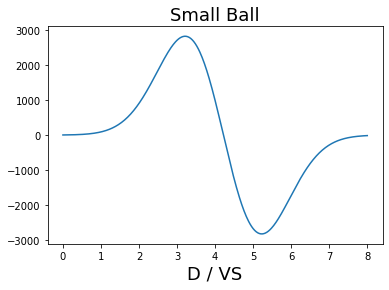

In [5]:
def pa_smallball(D, R, S0=1, SIG=1, k=1, VS=1500):
    t0 = 3*SIG
    dt = D/VS/100
    ts = np.linspace(0, 4*(D + R) / VS, int(2*(D + R) / VS / dt) + 1)

    p = 0 * ts
    integrate_min = D
    integrate_max = np.sqrt(D**2 + R**2)

    for i, t in enumerate(ts):
        def f(r):
            return -r*(VS*t - r - t0)*np.exp(-(VS*t - r - t0)**2 / (2*SIG**2))

        p[i], _ = integrate.quad(f, integrate_min, integrate_max)
        p[i] *= 2*k*np.pi*S0*VS / SIG**2

    plt.plot(ts*VS/D, p)
    font = {'size': 18}
    plt.title('Small Ball', fontdict=font)
    plt.xlabel('D / VS', fontdict=font)


plt.figure(4)
pa_smallball(1, 1)
plt.show()